# Deep Neural Network Classifer for DAC

-- DAC is a challenge-response based behavioral authentication system. It constructs a profile for each user, based on their circle drawing activity, and stores it at the server. During an authentication session, the collected user data is compared against stored profile to make an authentication decision. DAC is implemented as an app for Android user. For DAC, we collected data from 199 Amazon Mechanical Turks (AMT) and dropped outlier data.

-- We use DAC data to train a Deep Neural Network Classifer. The number of vectors in each DAC profile is around 140-180. The number of vector in each profile is not suffeceint to train a Deep Neural Network Classifer. We used oversampling technique to increase the profile size.

-- We then estimat the accuracy of Deep Neural Network Classifer for DAC data.

In [74]:
#import all packages
import csv
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
import random
from sklearn.utils import shuffle
import numpy as np
from numpy import array
from sklearn.model_selection import train_test_split
import warnings

In [43]:
#Read the normalized profile data
with open('Data/AllOriginalNData.csv') as csvfile:
    DataNSet = list(csv.reader(csvfile, delimiter=','))
with open('Data/allUserIndx.csv') as csvfile:
    dataIndex = list(csv.reader(csvfile, delimiter=','))
print('Successfully read the data..')

Successfully read data..


In [48]:
#Use dataframe and set column name
AllNDataSet = pd.DataFrame(DataNSet)
AllNDataSet=AllNDataSet[1:]

#print(dClass1.shape)
#print(dClass2.shape)
columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','F31','F32','F33','F34','F35','F36','F37','F38','F39',
            'F40','F41','F42','F43','F44','F45','F46','F47','F48','F49','F50','F51','F52','F53','F54','F55','F56','F57','F58','F59','F60',
            'F61','F62','F63','F64','F65','ID']
AllNDataSet.columns= columns 
AllNDataSet.head()        

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60,F61,F62,F63,F64,F65,ID
1,0.16604197064368384,0.10739354674425546,0.07117497153391529,0.07505547065793473,0.24743462122664162,0.3260382179689564,0.21310360041812107,0.19763658854087585,0.1158279923000801,0.08569580311805454,0.1384705112143959,0.003269755254764108,0.05530476307645043,0.14940130463762327,0.06856542076580235,0.14518074268963163,0.02610263511317432,0.14653035157436328,0.0929591827294403,0.08182926910927268,0.10576925540749739,0.016564238514342147,0.12824121499699548,0.11969157311415193,0.0599925410906684,0.14362442609620243,0.08647461936569545,0.08886886976989032,0.110987034605165,0.08975844151593236,0.16428571428571426,0.1483870967741935,0.1405,0.1390515463917526,0.1422680412371134,0.13939393939393938,0.13142857142857142,0.1408163265306122,0.15862068965517243,0.16235294117647056,0.1488392857142857,0.1488392857142857,0.11901785714285713,0.11901785714285713,0.1488392857142857,0.17857142857142858,0.11901785714285713,0.11901785714285713,0.11901785714285713,0.17857142857142858,0.6468788332082889,0.6696648544564788,0.6697493120346343,0.6701413951105702,0.674386091215733,0.6713432729609438,0.6706849624068189,0.6712571719964209,0.6703389941338666,0.6517564276359328,0.1719431136871497,0.15809048311951834,0.0,0.195852534562212,0.2328767123287671,A3MC5OA9RXOOFH
2,0.16604197064368384,0.10739354674425546,0.07117497153391529,0.07505547065793473,0.24743462122664162,0.3260382179689564,0.21310360041812107,0.19763658854087585,0.1158279923000801,0.08569580311805454,0.1384705112143959,0.003269755254764108,0.05530476307645043,0.14940130463762327,0.06856542076580235,0.14518074268963163,0.02610263511317432,0.14653035157436328,0.0929591827294403,0.08182926910927268,0.10576925540749739,0.016564238514342147,0.12824121499699548,0.11969157311415193,0.0599925410906684,0.14362442609620243,0.08647461936569545,0.08886886976989032,0.110987034605165,0.08975844151593236,0.16428571428571426,0.1483870967741935,0.1405,0.1390515463917526,0.1422680412371134,0.13939393939393938,0.13142857142857142,0.1408163265306122,0.15862068965517243,0.16235294117647056,0.1488392857142857,0.1488392857142857,0.11901785714285713,0.11901785714285713,0.1488392857142857,0.17857142857142858,0.11901785714285713,0.11901785714285713,0.11901785714285713,0.17857142857142858,0.6468788332082889,0.6696648544564788,0.6697493120346343,0.6701413951105702,0.674386091215733,0.6713432729609438,0.6706849624068189,0.6712571719964209,0.6703389941338666,0.6517564276359328,0.1719431136871497,0.15809048311951834,0.0,0.195852534562212,0.2328767123287671,A3MC5OA9RXOOFH
3,0.1610295206920834,0.11353831190109935,0.5100645231253049,0.282824878150661,0.21343910175160907,0.041145842930822324,0.08664878450065668,0.052861946727078,0.18414169779620906,0.26048206550834674,0.1466122707530549,0.06422052953890241,0.0869815488443789,0.10349397339302614,0.12233872608366077,0.10723757039709736,0.12522340308637525,0.14380780614522695,0.15297768811546478,0.03711353158530151,0.10610351885044852,0.04143284335803052,0.049297444790368974,0.05887234697995661,0.08112580863970958,0.13645636142082415,0.038355652394103004,0.07623717272754561,0.15337579711698848,0.13596485833604502,0.16809523809523808,0.1483870967741935,0.14375,0.14556701030927835,0.20049484536082476,0.16476767676767676,0.18521904761904762,0.21126530612244893,0.26326436781609197,0.19934117647058822,0.17857142857142858,0.1488392857142857,0.11901785714285713,0.17857142857142858,0.17857142857142858,0.17857142857142858,0.17857142857142858,0.17857142857142858,0.20830357142857142,0.17857142857142858,0.6371339083825356,0.6795576693545494,0.6796433746063462,0.6697389707044678,0.6695021932679076,0.6552628741773269,0.6510994121288122,0.6510994121288122,0.6568366650554972,0.6419380241483531,0.32150169120370553,0.1249702972940501,0.0,0.19124

In [49]:
#Estimate the size of each profile in DAC
AllNDataSet.groupby('ID').size()

ID
A3MC5OA9RXOOFH         180
Aron                   140
Athena                 140
Avrahman               100
COPIEDA5H767UHFV6JC    140
                      ... 
vasmturk               140
venkat                 140
walmnh                 140
wws1985                140
yash                   140
Length: 193, dtype: int64

In [50]:
# Replace the user name by class label and seperate the data in majority and minority class 
Identity=AllNDataSet['ID']
for i in range (0,195):
  indx1=int(float(dataIndex[0][i]))
  indx2=int(float(dataIndex[0][i+1]))
  #print(indx1)
  Identity[indx1:indx2]=i+1

AllNDataSet=AllNDataSet.drop(['ID'], axis=1)

AllNT1DataSet, AllNT2DataSet,IDT1,IDT2 = train_test_split(AllNDataSet, Identity, test_size=0.1, random_state=22)

IDT1=IDT1.astype(int)
IDT2=IDT2.astype(int)

AllNT1DataSet=pd.concat([IDT1,AllNT1DataSet], axis=1, join='inner')
AllNT2DataSet=pd.concat([IDT2,AllNT2DataSet], axis=1, join='inner')

AllNT1DataSet = AllNT1DataSet.sort_values('ID')
AllNT2DataSet = AllNT2DataSet.sort_values('ID')

AllNT1DataSet.reset_index(drop=True, inplace=True)
AllNT2DataSet.reset_index(drop=True, inplace=True)


In [51]:
#print the size of majority and minority class
#print(AllNDataSet.shape)
#print(dfdataSet)
AllNT2DataSet.groupby('ID').size()
#print(AllNT1DataSet)

ID
1      23
2      13
3      10
4      21
5      11
       ..
191    21
192     6
193    12
194    11
195    13
Length: 195, dtype: int64

In [53]:
#print the indices of all training proilfes 
DataIndex=AllNT1DataSet.groupby('ID').size().values
#print(DataIndex)
i=range(len(DataIndex)+1)
FDataIndex = array(i)

for i in range(len(DataIndex)):
  FDataIndex[i+1]=FDataIndex[i]+DataIndex[i]
 
#print(DataIndex)
print(FDataIndex)

[    0   157   284   414   513   642   765   857   913  1032  1157  1304
  1392  1516  1640  1769  1890  2020  2148  2279  2410  2533  2661  2781
  2907  3037  3162  3290  3416  3543  3674  3804  3912  4040  4165  4307
  4432  4553  4679  4792  4954  5075  5198  5318  5408  5531  5599  5723
  5847  5975  6028  6157  6280  6408  6538  6667  6793  6923  7089  7221
  7345  7468  7597  7740  7798  7851  7945  8072  8200  8325  8434  8562
  8687  8810  8954  9071  9196  9325  9415  9470  9526  9599  9765  9891
  9961 10106 10226 10347 10468 10521 10647 10714 10806 10880 11004 11135
 11278 11463 11592 11718 11845 11970 12074 12202 12325 12399 12523 12650
 12700 12757 12884 12936 12990 13122 13252 13375 13506 13626 13748 13866
 13992 14066 14193 14371 14514 14822 14964 15053 15181 15303 15447 15576
 15704 15832 15919 16011 16138 16214 16287 16415 16596 16758 16884 16971
 17096 17224 17348 17472 17616 17704 17809 17934 18062 18185 18277 18399
 18529 18660 18782 18915 19043 19117 19192 19314 19

In [55]:
# Oversampled the data of each training profile. We limit 1000 samples for minority (training profile) class
warnings.filterwarnings('ignore')

AllDataSet=AllNT1DataSet
length2 = len(AllDataSet)
#print(length2)
#minClass=AllDataSet[0:1]
#majClass=AllDataSet[0:1]

for indx in range(0,195):
  
  index1=int(float(FDataIndex[indx]))
  name=AllDataSet.at[index1, 'ID']
  #print(name)
  
  index2=int(float(FDataIndex[indx+1]))
  minClass=AllDataSet[index1:index2]
  majClass=AllDataSet[0:index1].append(AllDataSet[index2:length2])
  #print(majClass)
  index1=index2
  #print(len(minClass))
  #print(len(majClass))
  #print(len(minClass[0]))

  dfminClass = pd.DataFrame(minClass)

  dfmajClass = pd.DataFrame(majClass)
  dfminClass["ID"]=0
  dfmajClass["ID"]=1
  #print("User %s has %s samples" %(name,len(dfminClass)))
  #Class=dfminClass.append(dfmajClass.sample(n=1000)) 
  Class=dfminClass.append(dfmajClass.sample(n=1000))
  #print(len(Class))
  columns=Class.columns.tolist()
  columns=[c for c in columns if c not in ["ID"]]
  target="ID"
  state=np.random.RandomState(42)
  X=Class[columns]
  Y=Class[target]
  #sns.countplot('ID', data = Class)
  smk=SMOTETomek(random_state=42)
  X_res,y_res=smk.fit_sample(X,Y)
  #ada=ADASYN(random_state=42)
  #X_res,y_res = ada.fit_resample(X,Y)
  #print(X_res.shape,' ',y_res.shape)
  #FClass=np.concatenate((y_res,X_res),axis=1)
  #print(FClass.shape)
  #print(X_res.shape,y_res.shape)
  FClass=np.column_stack((X_res,y_res))
  dFClass = pd.DataFrame(FClass)
  dFClass.columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','F31','F32','F33','F34','F35','F36','F37','F38','F39',
            'F40','F41','F42','F43','F44','F45','F46','F47','F48','F49','F50','F51','F52','F53','F54','F55','F56','F57','F58','F59','F60',
            'F61','F62','F63','F64','F65','ID']
  dFClass=dFClass[dFClass['ID'] != 1]
  dFClass=dFClass.replace({'ID':{0:name}})
  dFClass.reindex(np.random.permutation(dFClass.index))
  if indx==0:
   AllClass=dFClass
  else:
    AllClass=pd.concat([AllClass,dFClass])
AllClass.index = range(AllClass.shape[0])

In [57]:
#print the size of the oversampled data
#print(AllClass.shape)
#print(dfdataSet)
AllClass.groupby('ID').size()

ID
1.0      1000
2.0      1000
3.0      1000
4.0      1000
5.0      1000
         ... 
191.0    1000
192.0    1000
193.0    1000
194.0    1000
195.0    1000
Length: 195, dtype: int64

In [60]:
#Seperate the class label and data of each profile
dfdataSet=AllClass

columnsN=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','F31','F32','F33','F34','F35','F36','F37','F38','F39',
            'F40','F41','F42','F43','F44','F45','F46','F47','F48','F49','F50','F51','F52','F53','F54','F55','F56','F57','F58','F59','F60',
            'F61','F62','F63','F64','F65','ID']

fdataSet = pd.DataFrame(columns = columnsN)

#print(fdataSet)
for i in range (0,195):
  #fdataSet=fdataSet.append(shuffle(dfdataSet[1000*(i-1):i*1000]),ignore_index = True)
  fdataSet=fdataSet.append(dfdataSet[1000*i:(i+1)*1000])

fDataSet=fdataSet.drop(columns=['ID'])
#fDataSet=standardize(fDataSet,columns=columnsF)

fIDSet = pd.DataFrame(columns = ['ID'])
fIDSet=fdataSet['ID']
for i in range (0,195):
  fIDSet[1000*i:(i+1)*1000]=i

#fDataSet['ID'] = fIDSet

In [70]:
#install tensorflow
!pip install tensorflow

In [72]:
#Seperate the oversampled data in [tranning set, validation set and test set] of all users
from tensorflow.keras.utils import to_categorical
X=fDataSet
y=fIDSet

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=22)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [73]:
#Print the sahpe of tranning data and id
print(X_train.shape)

(175500, 65)


In [75]:
#import necessary packages for deep neural network
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import torch.nn.functional as F

In [76]:
#define the optimizers
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(lr=0.001, rho=0.9)

In [77]:
#Construct a classifier for the initial experiments

def create_classifier(release=False,Tuser=195):
  classifier = Sequential()
  classifier.add(Dense(256, input_dim=65))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(512))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(512))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  #if release:
  classifier.add(Dense(Tuser, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  #classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifier()
Clasf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               16896     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2

In [79]:
# Train the Neural Network Classifer
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier= create_classifier(True,195)

lossc='categorical_crossentropy'
optimizerc=RMSprop(lr=0.001, rho=0.9)
Classfier.compile(loss=lossc, optimizer='Adam',metrics=['accuracy'])

history1 =  Classfier.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val),verbose=1, callbacks=callbacks_list)

Epoch 1/50
2743/2743 [==============================] - 39s 14ms/step - loss: 1.9611 - accuracy: 0.3960 - val_loss: 0.9079 - val_accuracy: 0.6606
Epoch 2/50
2743/2743 [==============================] - 37s 13ms/step - loss: 0.7256 - accuracy: 0.7333 - val_loss: 0.5336 - val_accuracy: 0.8070
Epoch 3/50
2743/2743 [==============================] - 37s 14ms/step - loss: 0.3566 - accuracy: 0.8752 - val_loss: 0.3429 - val_accuracy: 0.8818
Epoch 4/50
2743/2743 [==============================] - 37s 14ms/step - loss: 0.2386 - accuracy: 0.9174 - val_loss: 0.2344 - val_accuracy: 0.9200
Epoch 5/50
2743/2743 [==============================] - 37s 13ms/step - loss: 0.1741 - accuracy: 0.9396 - val_loss: 0.1975 - val_accuracy: 0.9317
Epoch 6/50
2743/2743 [==============================] - 37s 13ms/step - loss: 0.1518 - accuracy: 0.9465 - val_loss: 0.1521 - val_accuracy: 0.9483
Epoch 7/50
2743/2743 [==============================] - 37s 14ms/step - loss: 0.1411 - accuracy: 0.9504 - val_loss: 0.1112 -

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'epochs')]

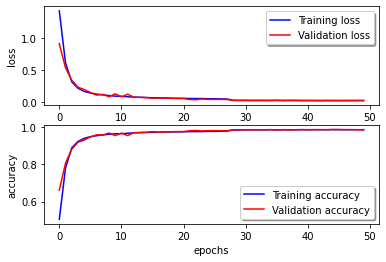

In [82]:
# Plot the classifier loss and accuracy curves for the training and validation data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history1.history['loss'], color='b', label="Training loss")
ax[0].plot(history1.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set(xlabel='epochs', ylabel='loss')


ax[1].plot(history1.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set(xlabel='epochs', ylabel='accuracy')

In [101]:
#Calculate the accuracy for test data
y_test=AllNT2DataSet['ID']
X_test=AllNT2DataSet.drop(['ID'],axis=1).astype(float)
y_test=y_test.astype(int)-1
y_test = to_categorical(y_test)
print(y_test)
Classfier.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier.evaluate(X_test, y_test)
#print('Test score:', score)
print('Accuracy:', accuracy)
print('Loss:', loss)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
81/81 [==============================] - 1s 3ms/step - loss: 0.6658 - accuracy: 0.9324
Accuracy: 0.9153005480766296
Loss: 0.6649223566055298
